In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, chi2_contingency, f_oneway, ttest_ind

In [ ]:
df = pd.read_csv('cardio_data(IQR-pre_binning).csv', index_col="Unnamed: 0")
pinned_df = pd.read_csv('/content/cardio_train_cleaned(IQR).csv')

In [ ]:
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = [6, 5]
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# EDA Continous data, (without pinning)

## dataset information

### Dataset Feature Description Table (Non-Binned)

**Note:** The table below describes the current dataset features, including their categories, column names, data types, and additional details after preprocessing and feature engineering.

| **Feature**                               | **Category**           | **Column Name** | **Data Type**         | **Details**                                                 |
|-------------------------------------------|------------------------|-----------------|-----------------------|-------------------------------------------------------------|
| Age (in years)                            | Objective Feature      | age             | int                   | Converted from days to years                                |
| Gender                                     | Objective Feature      | gender          | categorical (int)     | 1: female, 2: male                                           |
| Cholesterol                                | Examination Feature    | cholesterol     | categorical (int)     | 1: normal, 2: above normal, 3: well above normal            |
| Glucose                                    | Examination Feature    | gluc            | categorical (int)     | 1: normal, 2: above normal, 3: well above normal            |
| Smoking                                    | Subjective Feature     | smoke           | categorical (binary)  | 1: yes, 0: no                                               |
| Alcohol intake                             | Subjective Feature     | alco            | categorical (binary)  | 1: yes, 0: no                                               |
| Physical activity                          | Subjective Feature     | active          | categorical (binary)  | 1: active, 0: inactive                                      |
| Cardiovascular disease (target)            | Target Variable        | cardio          | categorical (binary)  | 1: presence, 0: absence                                     |
| Body Mass Index (BMI)                      | Engineered Feature     | BMI             | float                 | Calculated as weight (kg) / height (m)^2                    |
| Mean Arterial Pressure (MAP)              | Engineered Feature     | MAP             | float                 | Calculated as (ap_hi + 2 × ap_lo) / 3                       |


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62502 entries, 0 to 69999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          62502 non-null  int64  
 1   gender       62502 non-null  int64  
 2   cholesterol  62502 non-null  int64  
 3   gluc         62502 non-null  int64  
 4   smoke        62502 non-null  int64  
 5   alco         62502 non-null  int64  
 6   active       62502 non-null  int64  
 7   cardio       62502 non-null  int64  
 8   BMI          62502 non-null  float64
 9   MAP          62502 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 5.2 MB


## Viewing first five rows as an example

In [ ]:
df.head()

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,BMI,MAP
0,50,2,1,1,0,0,1,0,21.967120,90.000000
1,55,1,3,1,0,0,1,1,34.927679,106.666667
2,51,1,3,1,0,0,0,1,23.507805,90.000000
3,48,2,1,1,0,0,1,1,28.710479,116.666667
5,60,1,2,2,0,0,0,0,29.384676,93.333333


## checking for unique values per column

In [ ]:
df.nunique()

,0
age,26
gender,2
cholesterol,3
gluc,3
smoke,2
alco,2
active,2
cardio,2
BMI,2639
MAP,146


## categorical vs numerical columns

In [ ]:
target = df['cardio']
numerical_cols = ['age', 'BMI', 'MAP']
categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
print(f"Categorical Columns: {categorical_cols}")
print(f"Numerical Columns: {numerical_cols}")

Categorical Columns: ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
Numerical Columns: ['age', 'BMI', 'MAP']


## summary statistics for numerical columns

In [ ]:
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,62502.0,52.908867,6.741475,39.000000,48.000000,54.000000,58.000000,64.000000
BMI,62502.0,27.120241,4.567616,13.520822,23.875115,26.233556,29.760838,50.891795
MAP,62502.0,96.606210,9.123987,73.333333,93.333333,93.333333,103.333333,126.000000


## summary for categorical columns

In [ ]:
for col in categorical_cols:
    print(f"{col}:")
    print(f"{df[col].value_counts()} ")

gender:
gender
1    40715
2    21787
Name: count, dtype: int64 
cholesterol:
cholesterol
1    47211
2     8224
3     7067
Name: count, dtype: int64 
gluc:
gluc
1    53405
3     4694
2     4403
Name: count, dtype: int64 
smoke:
smoke
0    57105
1     5397
Name: count, dtype: int64 
alco:
alco
0    59241
1     3261
Name: count, dtype: int64 
active:
active
1    50271
0    12231
Name: count, dtype: int64 


## duplicate rows

In [ ]:
print("Duplicate Rows in Dataset:")
print(df.duplicated().sum())

Duplicate Rows in Dataset:
3291


## Target value proportions

In [ ]:
target_proportions = target.value_counts(normalize=True)
print(target_proportions)

cardio
0    0.506096
1    0.493904
Name: proportion, dtype: float64


Visualizing target value proportions

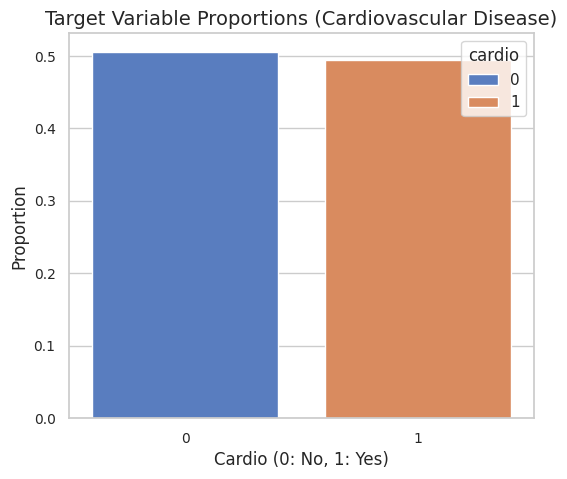

In [ ]:
sns.barplot(x=target_proportions.index, y=target_proportions.values, hue = target_proportions.index )
plt.title("Target Variable Proportions (Cardiovascular Disease)")
plt.xlabel("Cardio (0: No, 1: Yes)")
plt.ylabel("Proportion")
plt.show()

## Outlier Detection and Visualzation

Visualizing outliers with boxplots

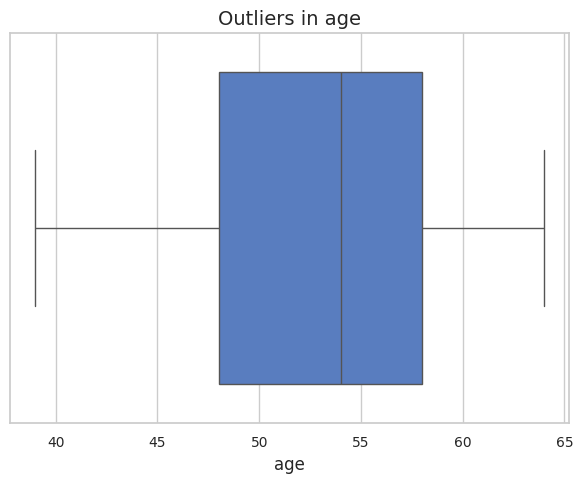

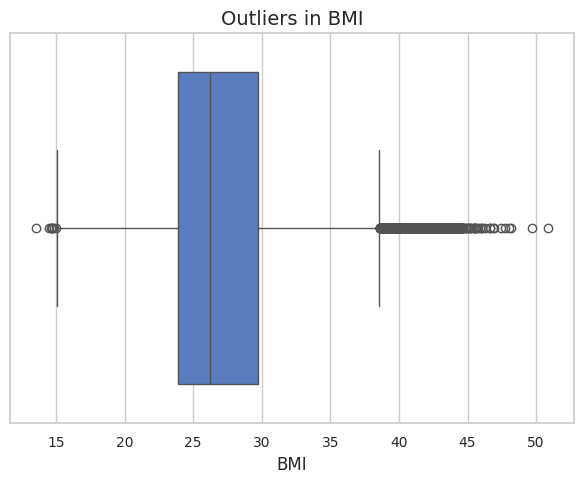

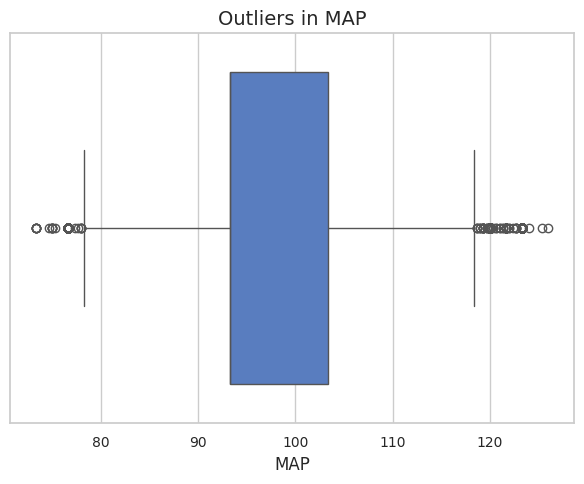

In [ ]:
for feature in numerical_cols:
    sns.boxplot(data=df, x=feature)
    plt.title(f"Outliers in {feature}")
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()

## Feature distribution

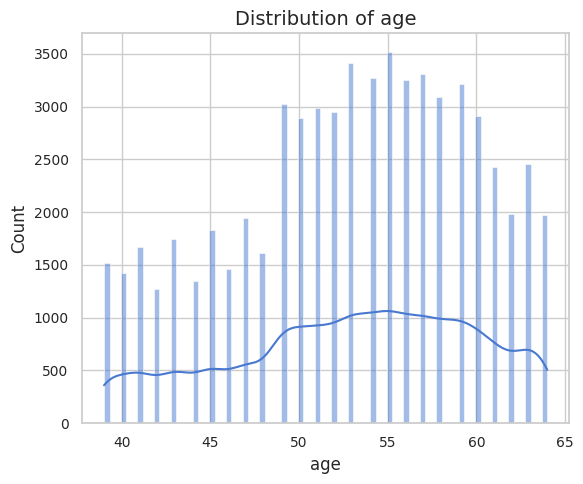

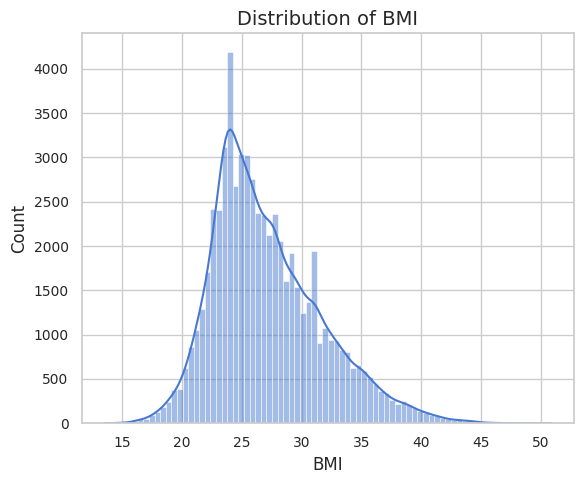

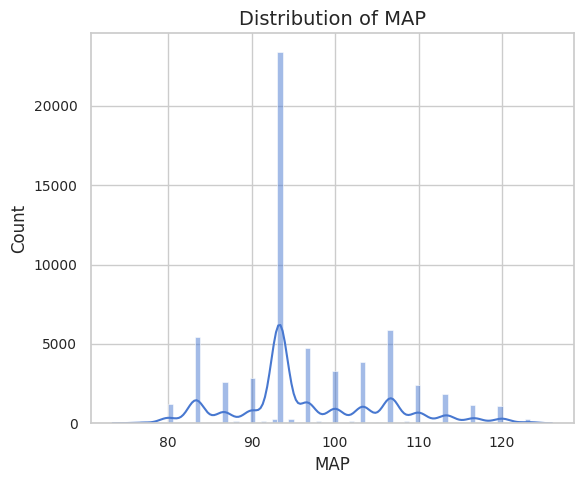

In [ ]:
for col in numerical_cols:
    sns.histplot(data=df, x=col, kde=True, bins=80)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


categorical features

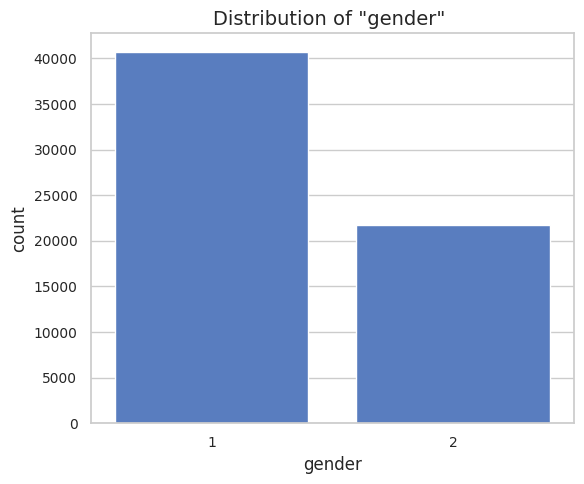

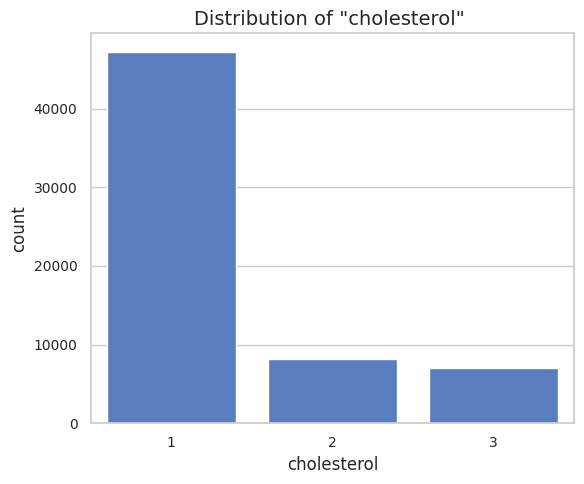

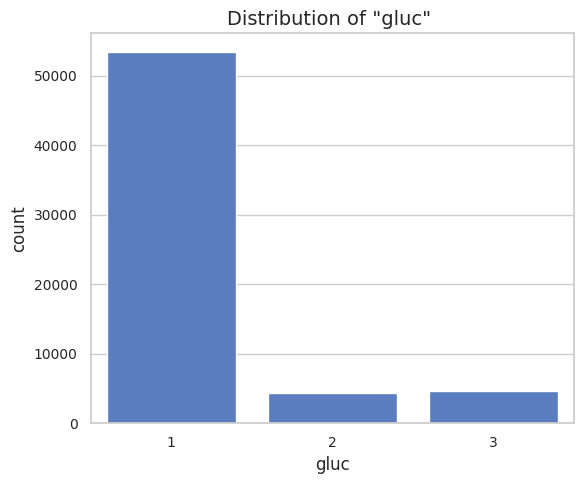

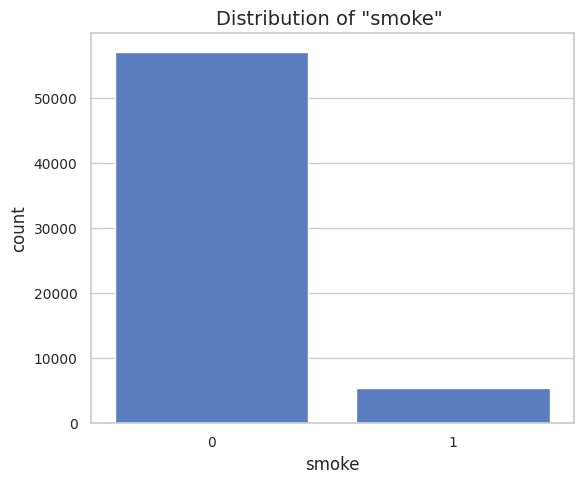

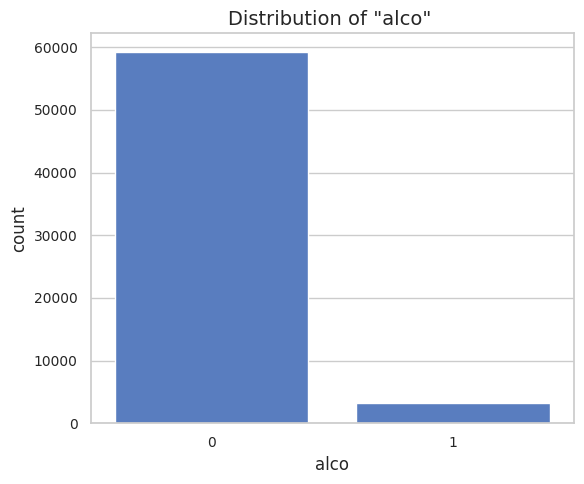

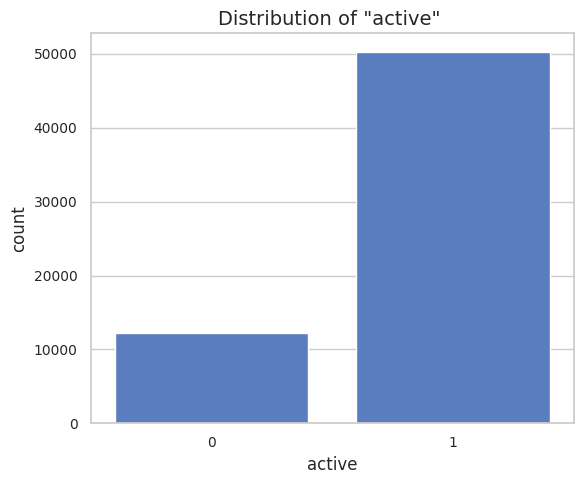

In [ ]:
for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.title(f"""Distribution of "{col}" """)
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

## Correlation Matrix

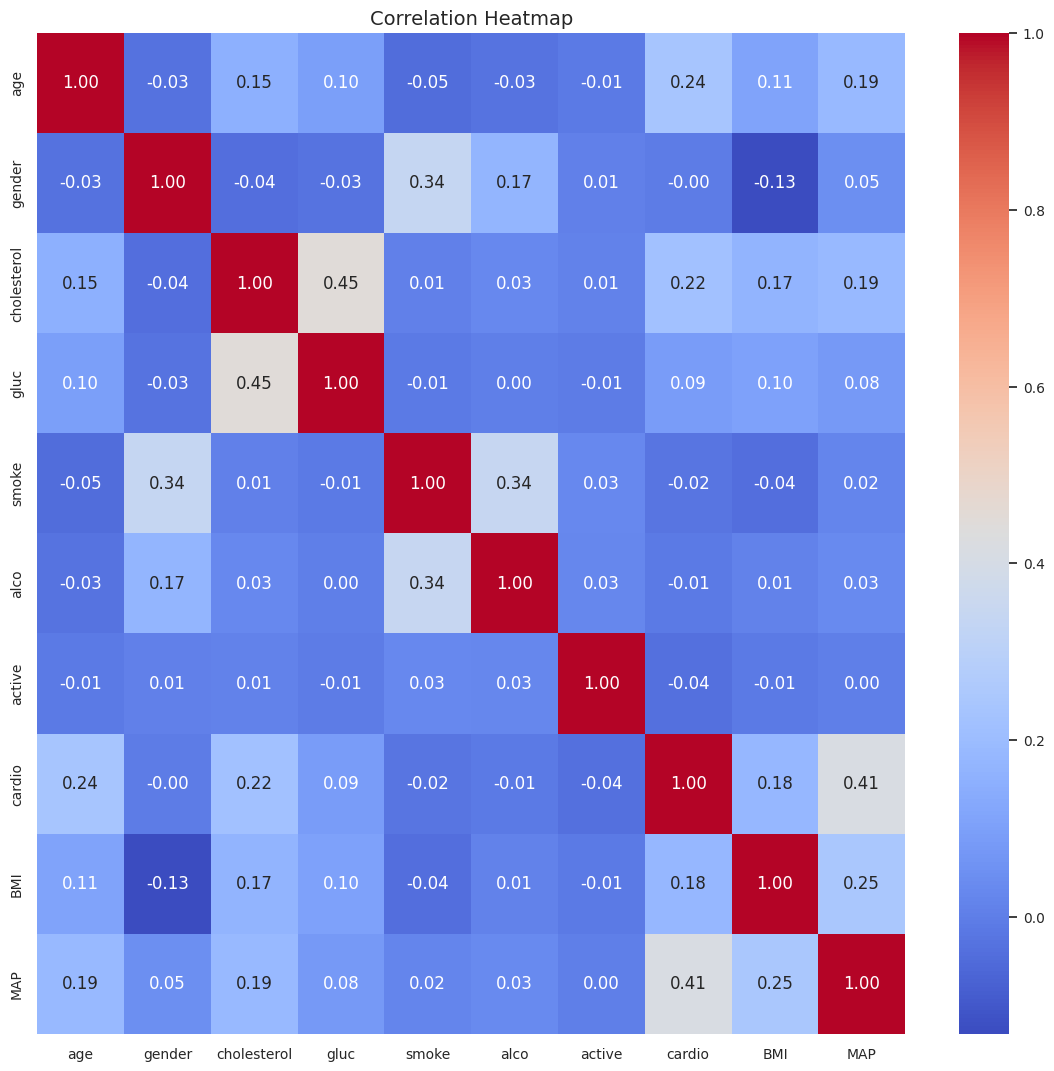

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(14, 13))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

### multicolinearity test

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[numerical_cols]
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

  Feature        VIF
0     age  51.671418
1     BMI  36.494658
2     MAP  69.587931


## Univariate Analysis against target

### Continuous variables vs target

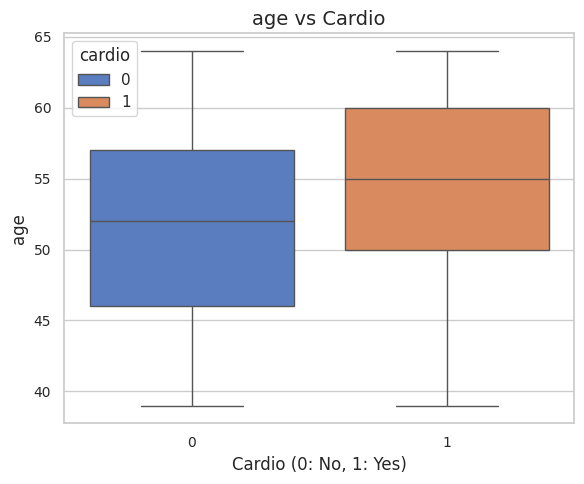

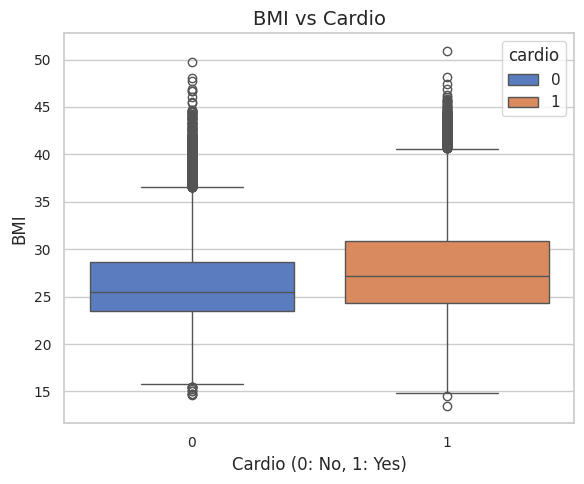

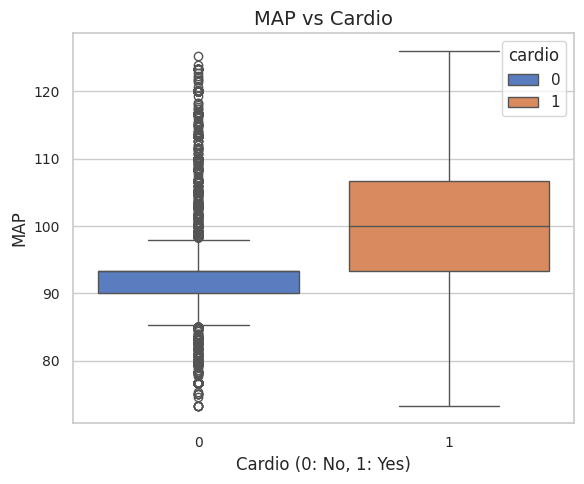

In [ ]:
for col in numerical_cols:
    sns.boxplot(data=df, x='cardio', y=col, hue = 'cardio')
    plt.title(f"{col} vs Cardio")
    plt.xlabel("Cardio (0: No, 1: Yes)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()
    print()

### categorical variables vs target

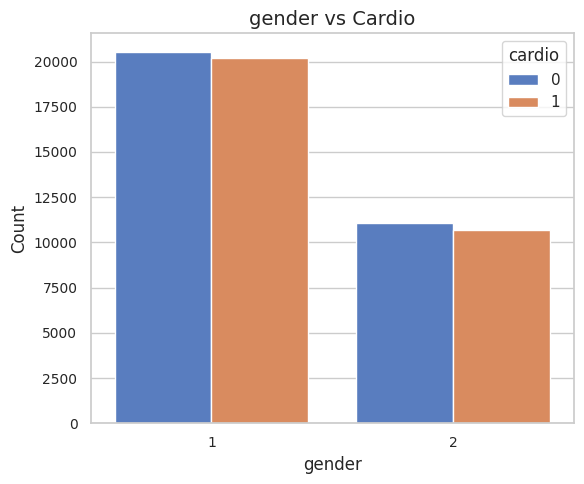

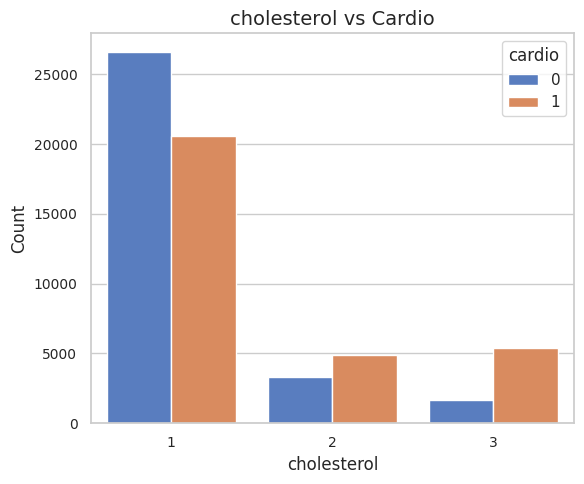

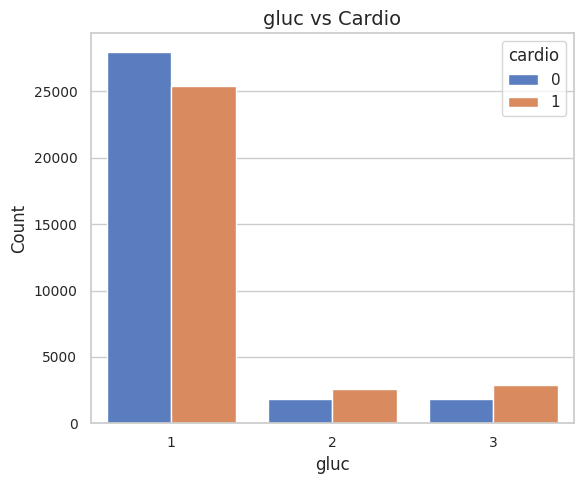

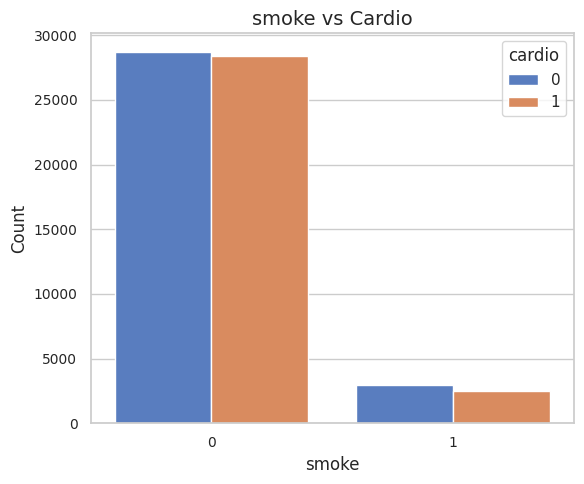

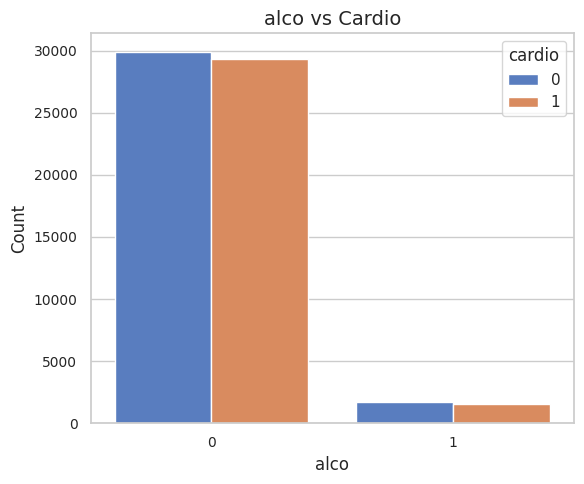

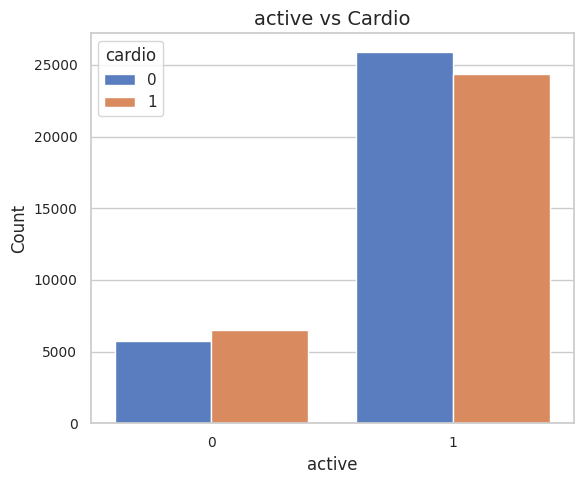

In [ ]:
for col in categorical_cols:
    sns.countplot(data=df, x=col, hue='cardio')
    plt.title(f"{col} vs Cardio")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
    print()

## overall data representation

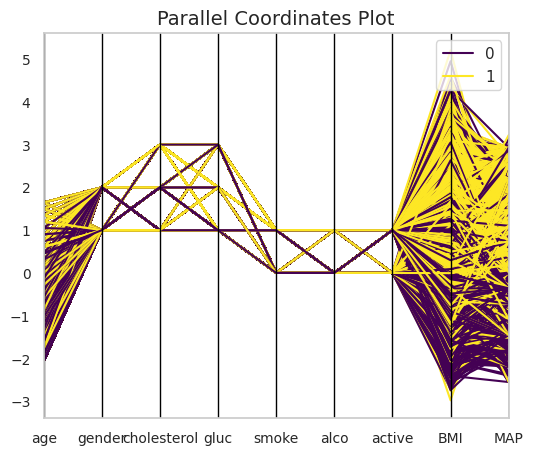

In [ ]:
#scale columns bmi, map and age
df[['BMI', 'MAP', 'age']] = df[['BMI', 'MAP', 'age']].apply(lambda x: (x - x.mean()) / x.std())
pd.plotting.parallel_coordinates(df, 'cardio', colormap='viridis')
plt.title("Parallel Coordinates Plot")
plt.show()

## Statistical Tests

### chi square tests

In [ ]:
for col in categorical_cols:
  contingency = pd.crosstab(df[col], df['cardio'])
  chi2, p, dof, expected = chi2_contingency(contingency)
  print(f"{col}: \nChi-square statistic = {chi2}, p-value = {p}")
  if p < 0.05:
    print(f"{col} is significantly associated with cardio.")
  else:
    print(f"{col} is not significantly associated with cardio.")
  print('------------------------')

gender: 
Chi-square statistic = 1.4286080419275504, p-value = 0.23199174114503676
gender is not significantly associated with cardio.
------------------------
cholesterol: 
Chi-square statistic = 2976.591806584278, p-value = 0.0
cholesterol is significantly associated with cardio.
------------------------
gluc: 
Chi-square statistic = 476.40217121281086, p-value = 3.552899621836125e-104
gluc is significantly associated with cardio.
------------------------
smoke: 
Chi-square statistic = 30.56660388346009, p-value = 3.225991541294049e-08
smoke is significantly associated with cardio.
------------------------
alco: 
Chi-square statistic = 9.378311120520276, p-value = 0.0021956774656489726
alco is significantly associated with cardio.
------------------------
active: 
Chi-square statistic = 88.52172374744669, p-value = 5.027966513096757e-21
active is significantly associated with cardio.
------------------------


### ANOVA tests

In [ ]:
for col in numerical_cols:
  group1 = df[df['cardio'] == 0][col]
  group2 = df[df['cardio'] == 1][col]
  f_stat, p_val = f_oneway(group1, group2)
  print(f"{col}: \nF-statistic = {f_stat}, p-value = {p_val}")
  if p_val < 0.05:
    print(f"{col} is significantly associated with cardio.")
  else:
    print(f"{col} is not significantly associated with cardio.")
  print('------------------------')

age: 
F-statistic = 3697.221822816997, p-value = 0.0
age is significantly associated with cardio.
------------------------
BMI: 
F-statistic = 2067.191412385427, p-value = 0.0
BMI is significantly associated with cardio.
------------------------
MAP: 
F-statistic = 12942.259387076181, p-value = 0.0
MAP is significantly associated with cardio.
------------------------


# Binned Data

## dataset information

### Dataset Feature Description Table (After Binning)

**Note:** The table below describes the updated dataset features after binning continuous variables. Binned columns are now categorical.

| **Feature**                               | **Category**           | **Column Name** | **Data Type**         | **Details**                                                 |
|-------------------------------------------|------------------------|-----------------|-----------------------|-------------------------------------------------------------|
| Age (binned)                              | Objective Feature      | age             | categorical            | Binned into 5 groups based on quantiles or equal-width bins |
| Gender                                     | Objective Feature      | gender          | categorical (int)     | 1: female, 2: male                                           |
| Cholesterol                                | Examination Feature    | cholesterol     | categorical (int)     | 1: normal, 2: above normal, 3: well above normal            |
| Glucose                                    | Examination Feature    | gluc            | categorical (int)     | 1: normal, 2: above normal, 3: well above normal            |
| Smoking                                    | Subjective Feature     | smoke           | categorical (binary)  | 1: yes, 0: no                                               |
| Alcohol intake                             | Subjective Feature     | alco            | categorical (binary)  | 1: yes, 0: no                                               |
| Physical activity                          | Subjective Feature     | active          | categorical (binary)  | 1: active, 0: inactive                                      |
| Cardiovascular disease (target)            | Target Variable        | cardio          | categorical (binary)  | 1: presence, 0: absence                                     |
| Body Mass Index (binned)                   | Engineered Feature     | BMI             | categorical            | Calculated from weight/height, then binned into 5 groups    |
| Mean Arterial Pressure (binned)            | Engineered Feature     | MAP             | categorical            | Derived from ap_hi and ap_lo, then binned into 5 groups     |


In [ ]:
pinned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62502 entries, 0 to 62501
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          60980 non-null  float64
 1   gender       62502 non-null  int64  
 2   cholesterol  62502 non-null  int64  
 3   gluc         62502 non-null  int64  
 4   smoke        62502 non-null  int64  
 5   alco         62502 non-null  int64  
 6   active       62502 non-null  int64  
 7   cardio       62502 non-null  int64  
 8   BMI          62501 non-null  float64
 9   MAP          62496 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 4.8 MB


In [ ]:
cols_to_convert = ['age', 'BMI', 'MAP', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
pinned_df[cols_to_convert] = pinned_df[cols_to_convert].astype('category')


In [ ]:
# View first rows
pinned_df.head()

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,BMI,MAP
0,3.0,2,1,1,0,0,1,0,2.0,2.0
1,4.0,1,3,1,0,0,1,1,3.0,4.0
2,3.0,1,3,1,0,0,0,1,2.0,2.0
3,2.0,2,1,1,0,0,1,1,3.0,5.0
4,5.0,1,2,2,0,0,0,0,3.0,2.0


In [ ]:
# Unique values per column
pinned_df.nunique()


,0
age,5
gender,2
cholesterol,3
gluc,3
smoke,2
alco,2
active,2
cardio,2
BMI,5
MAP,5


In [ ]:
target = pinned_df['cardio']
categorical_cols = [col for col in pinned_df.columns if col != 'cardio']
print(f"Categorical Columns: {categorical_cols}")

Categorical Columns: ['age', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'BMI', 'MAP']


In [ ]:
print("Duplicate Rows in Dataset:")
print(pinned_df.duplicated().sum())


Duplicate Rows in Dataset:
56242


In [ ]:
pinned_df.tail()

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,BMI,MAP
62497,3.0,1,1,1,0,0,1,1,2.0,3.0
62498,4.0,1,1,1,0,0,1,1,3.0,3.0
62499,3.0,2,1,1,1,0,1,0,2.0,2.0
62500,5.0,1,1,2,0,0,0,1,2.0,3.0
62501,4.0,1,2,1,0,0,1,0,2.0,2.0


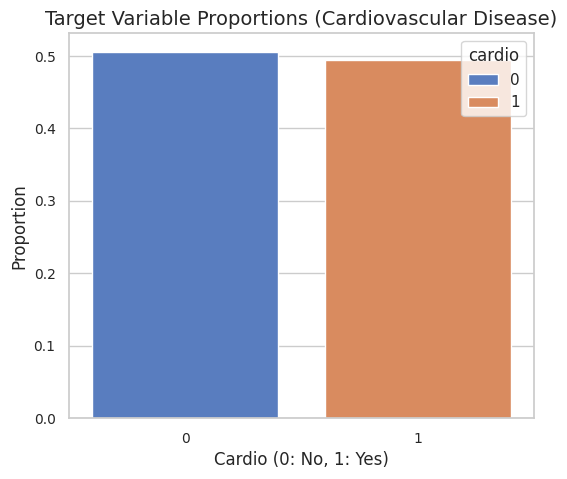

In [ ]:
sns.barplot(x=target_proportions.index, y=target_proportions.values, hue=target_proportions.index)
plt.title("Target Variable Proportions (Cardiovascular Disease)")
plt.xlabel("Cardio (0: No, 1: Yes)")
plt.ylabel("Proportion")
plt.show()


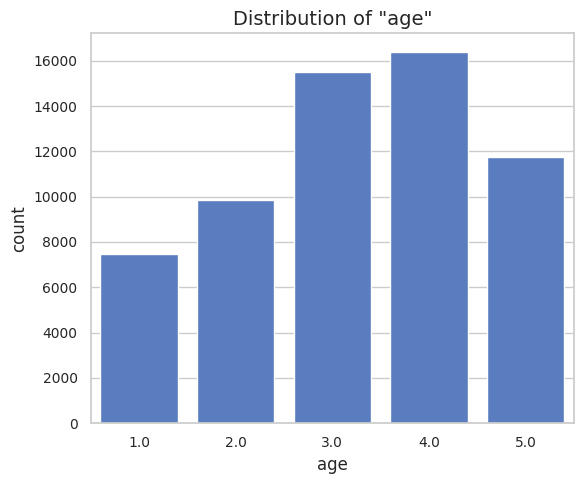

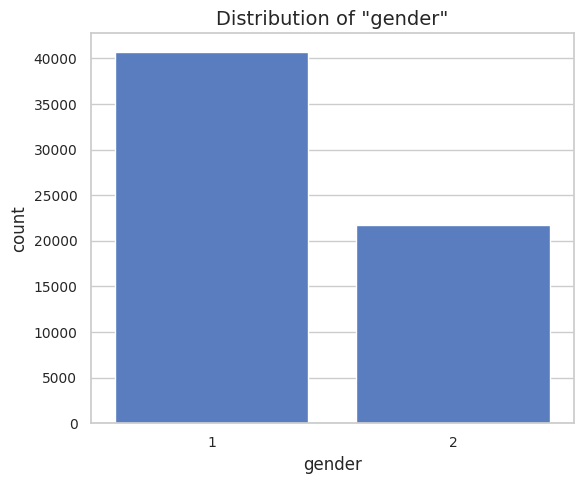

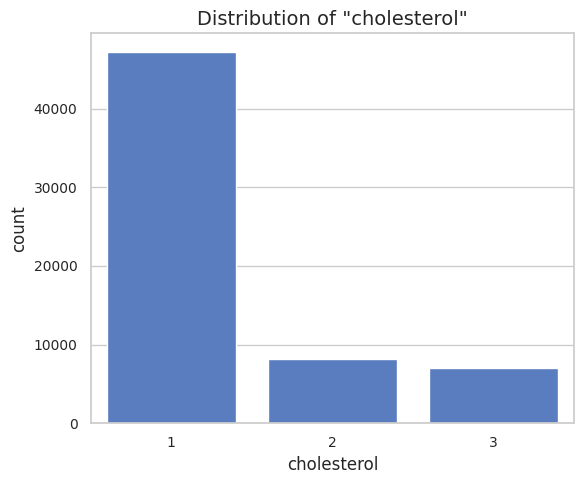

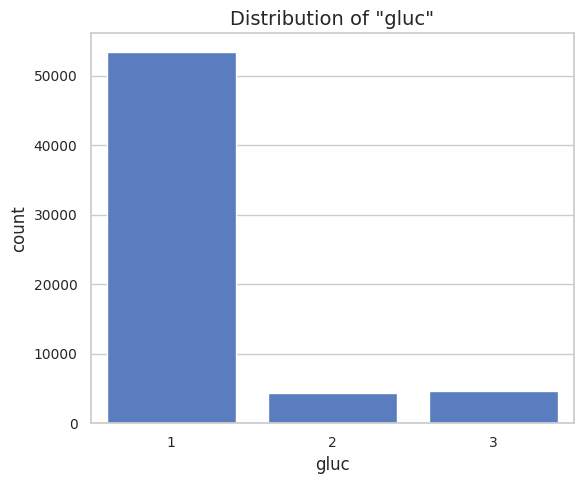

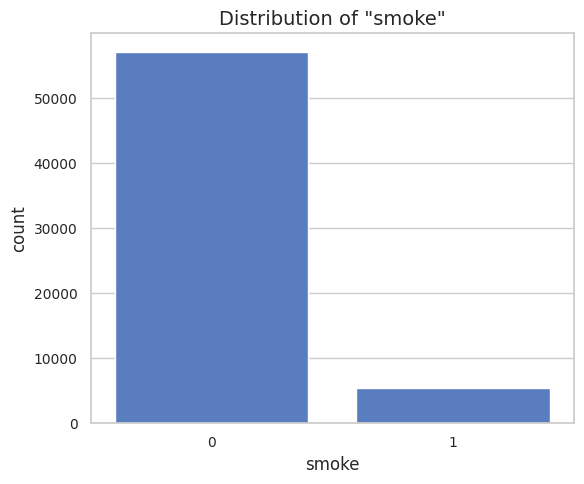

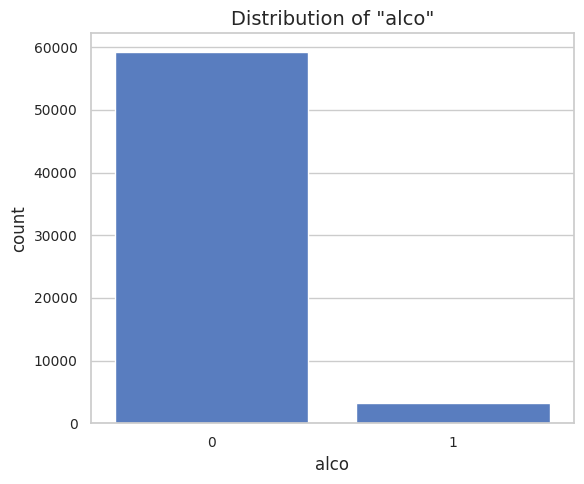

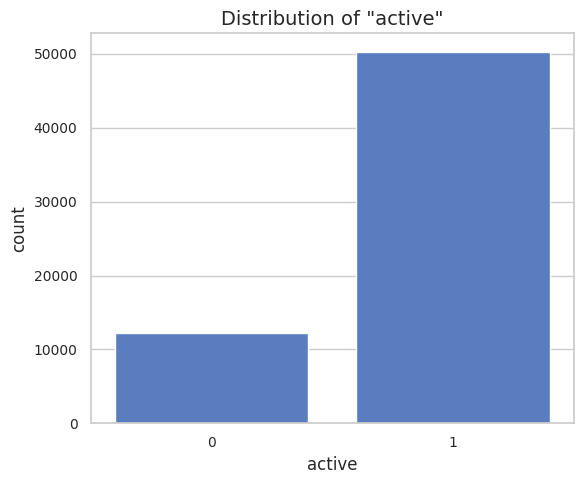

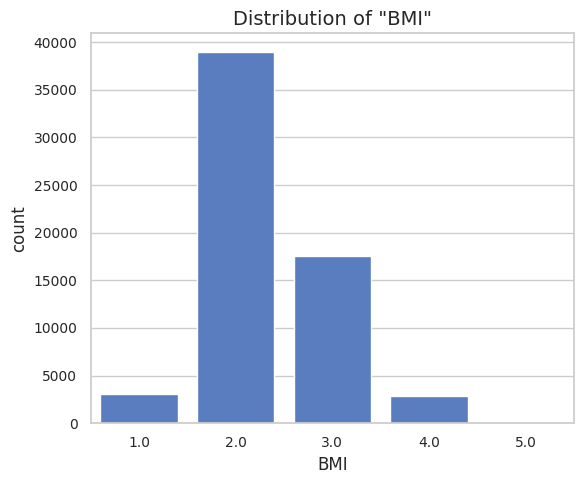

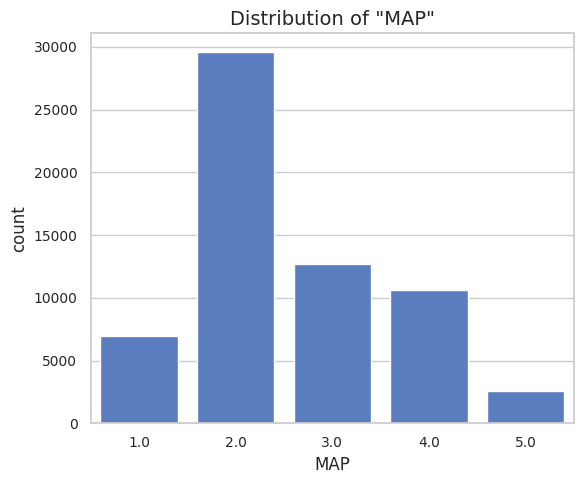

In [ ]:
for col in categorical_cols:
    sns.countplot(data=pinned_df, x=col)
    plt.title(f'Distribution of "{col}"')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


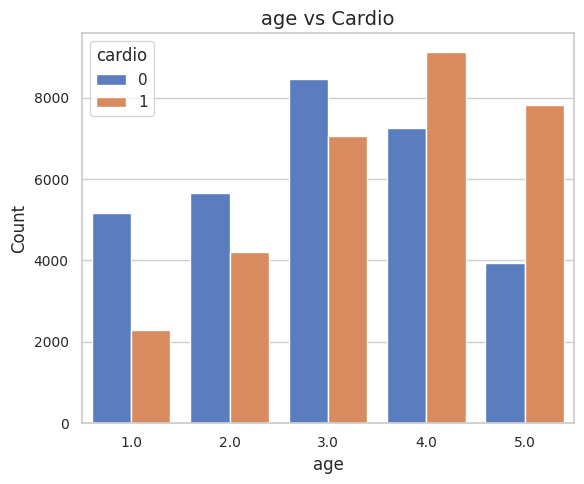

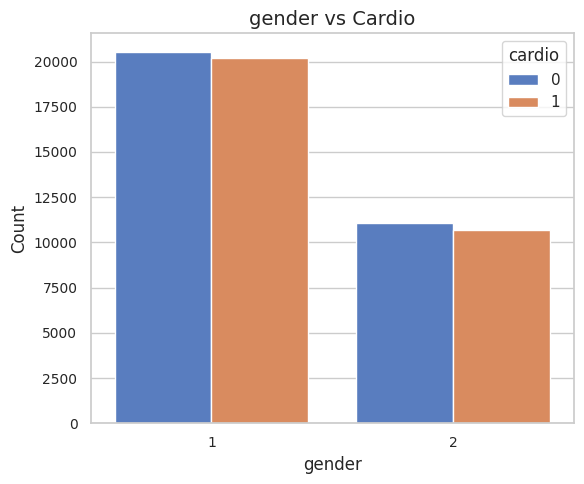

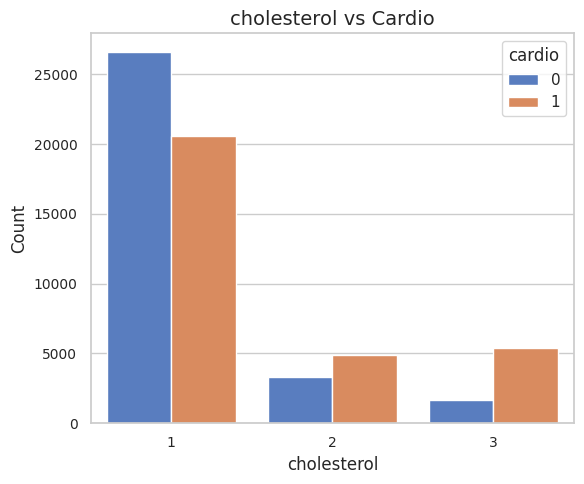

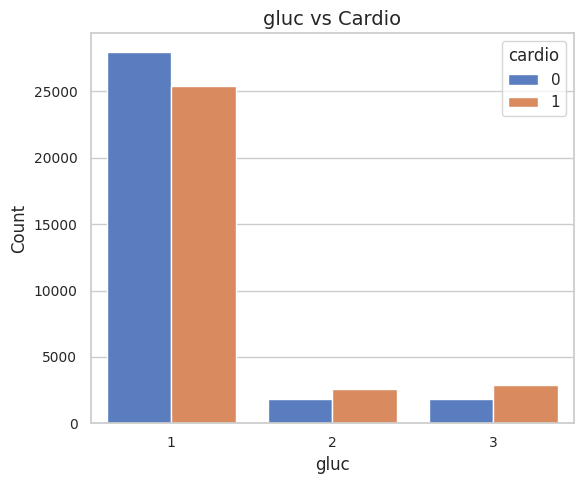

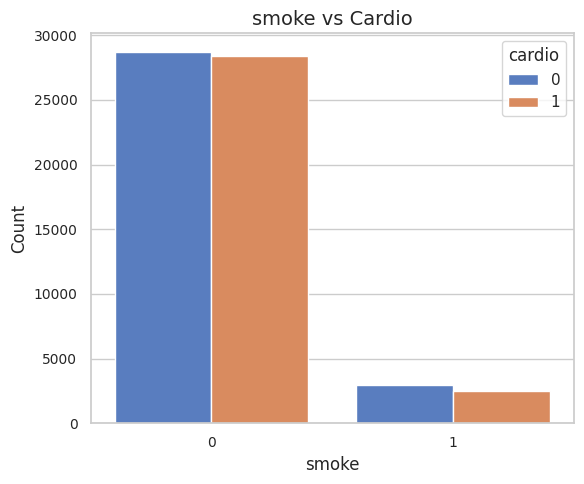

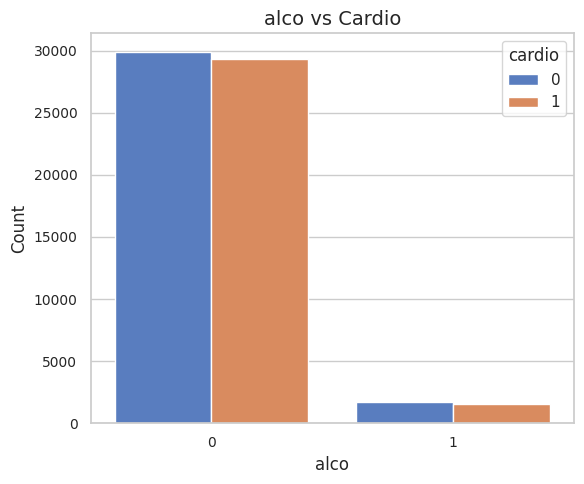

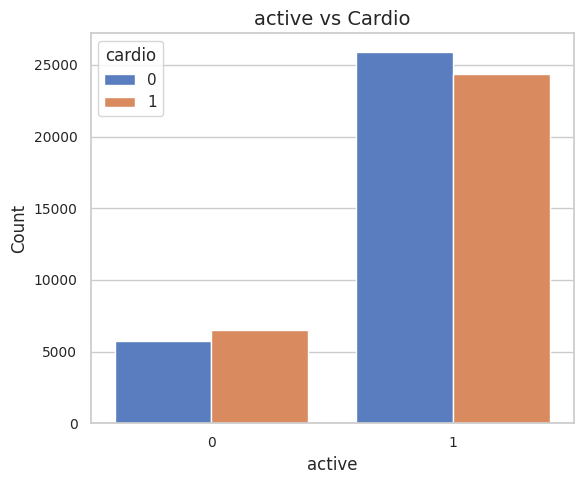

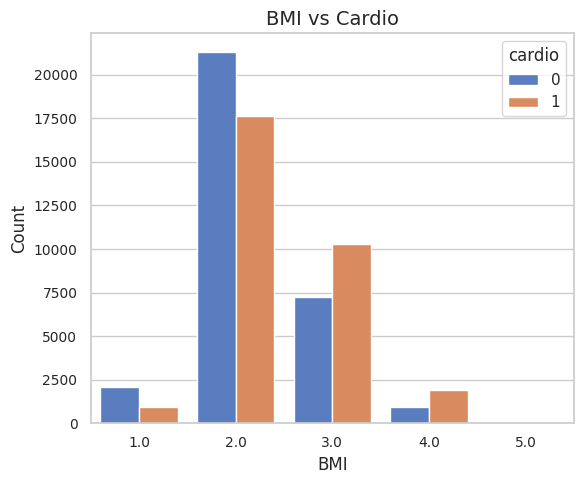

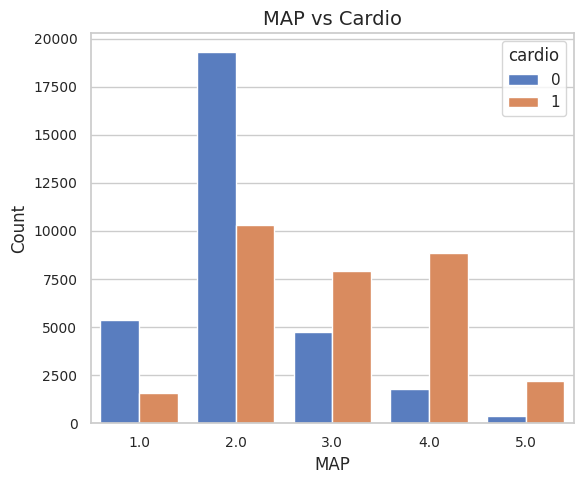

In [ ]:
for col in categorical_cols:
    sns.countplot(data=pinned_df, x=col, hue='cardio')
    plt.title(f"{col} vs Cardio")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

In [ ]:
for col in categorical_cols:
    contingency = pd.crosstab(pinned_df[col], pinned_df['cardio'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"{col}: \nChi-square statistic = {chi2}, p-value = {p}")
    if p < 0.05:
        print(f"{col} is significantly associated with cardio.")
    else:
        print(f"{col} is not significantly associated with cardio.")
    print('------------------------')

age: 
Chi-square statistic = 2964.9920461976926, p-value = 0.0
age is significantly associated with cardio.
------------------------
gender: 
Chi-square statistic = 1.4286080419275504, p-value = 0.23199174114503676
gender is not significantly associated with cardio.
------------------------
cholesterol: 
Chi-square statistic = 2976.591806584278, p-value = 0.0
cholesterol is significantly associated with cardio.
------------------------
gluc: 
Chi-square statistic = 476.40217121281086, p-value = 3.552899621836125e-104
gluc is significantly associated with cardio.
------------------------
smoke: 
Chi-square statistic = 30.56660388346009, p-value = 3.225991541294049e-08
smoke is significantly associated with cardio.
------------------------
alco: 
Chi-square statistic = 9.378311120520276, p-value = 0.0021956774656489726
alco is significantly associated with cardio.
------------------------
active: 
Chi-square statistic = 88.52172374744669, p-value = 5.027966513096757e-21
active is signifi

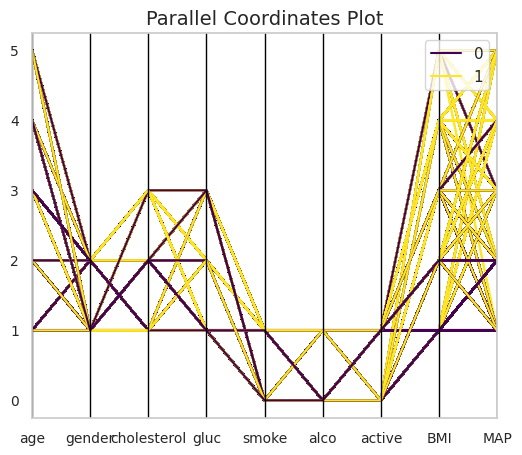

In [ ]:
pd.plotting.parallel_coordinates(pinned_df, 'cardio', colormap='viridis')
plt.title("Parallel Coordinates Plot")
plt.show()

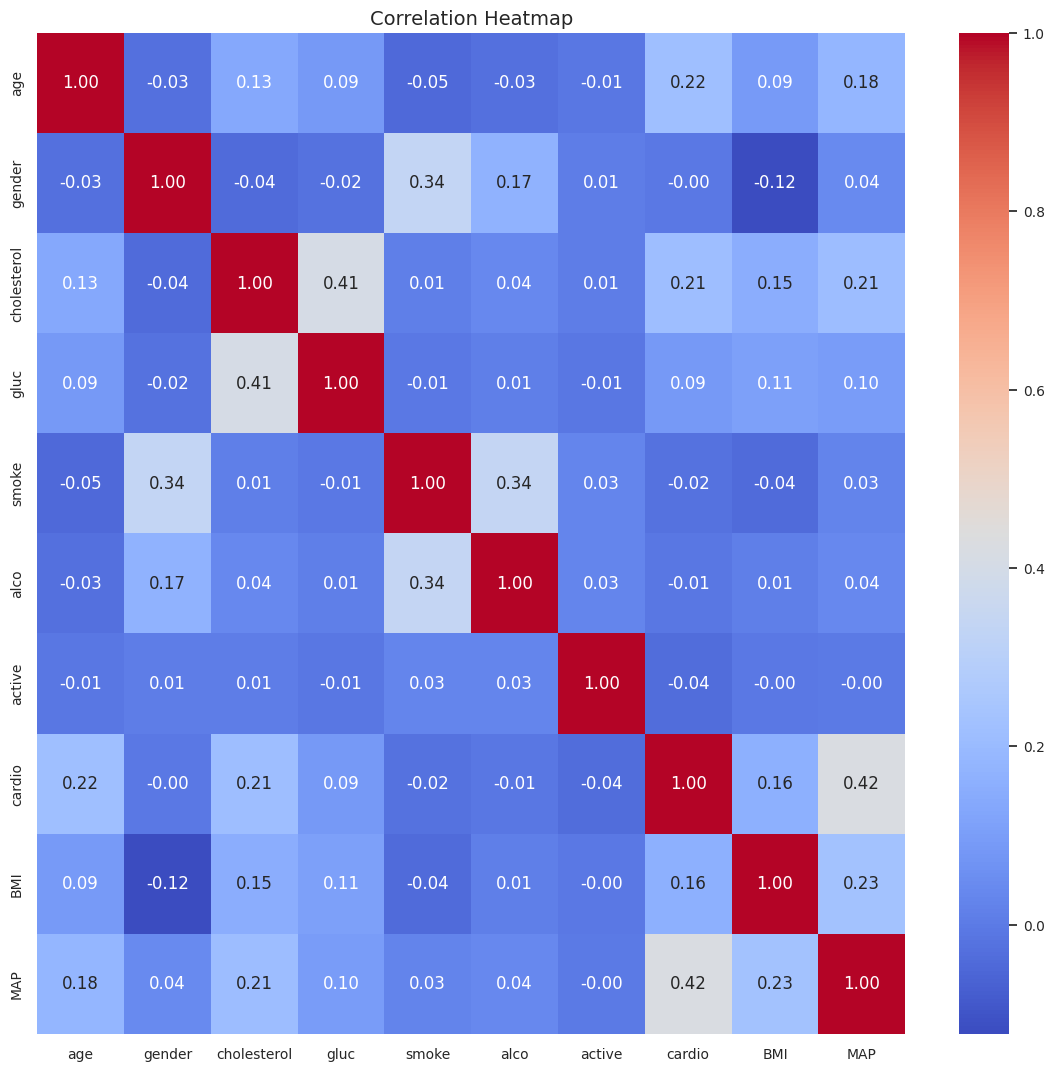

In [ ]:
#spearman correlation
corr = pinned_df.corr(method='spearman')
plt.figure(figsize=(14, 13))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()